In [2]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


In [3]:
test_df = pd.read_csv("tested.csv")

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
test_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
total = test_df.isnull().sum().sort_values(ascending=False)
percent_1 = test_df.isnull().sum()/test_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Survived,0,0.0


In [8]:
test_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

C:\Users\HP\AppData\Local\Temp\ipykernel_24204\2305792147.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
C:\Users\HP\AppData\Local\Temp\ipykernel_24204\2305792147.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

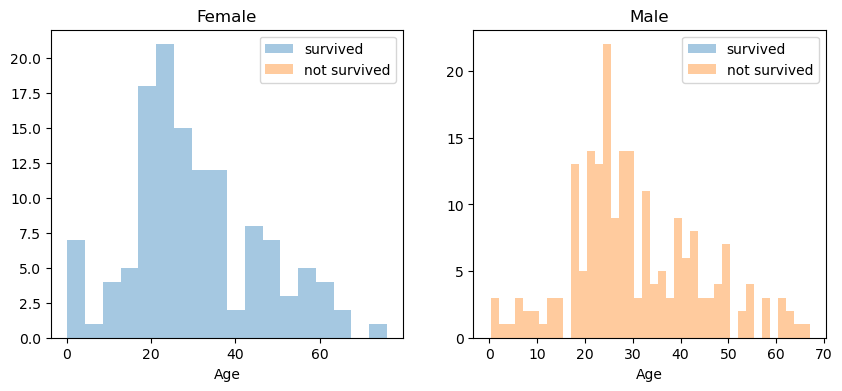

In [9]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = test_df[test_df['Sex']=='female']
men = test_df[test_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

<Axes: xlabel='Pclass', ylabel='Survived'>

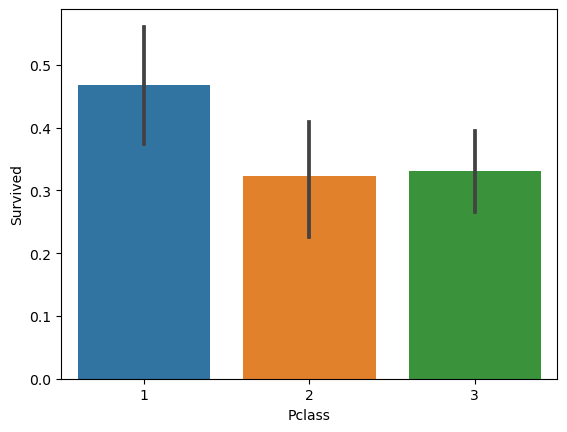

In [11]:
sns.barplot(x='Pclass', y='Survived', data=test_df)

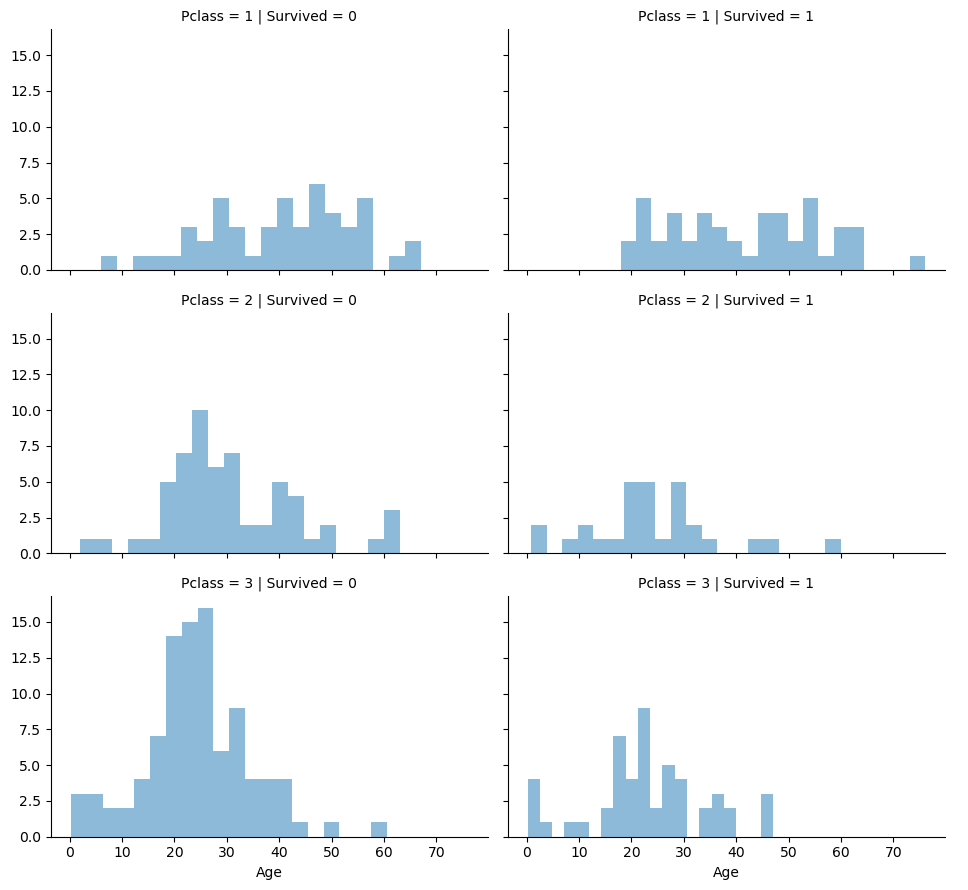

In [16]:
grid = sns.FacetGrid(test_df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\HP\AppData\Local\Temp\ipykernel_24204\2687444066.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = test_df.corr()


<Axes: >

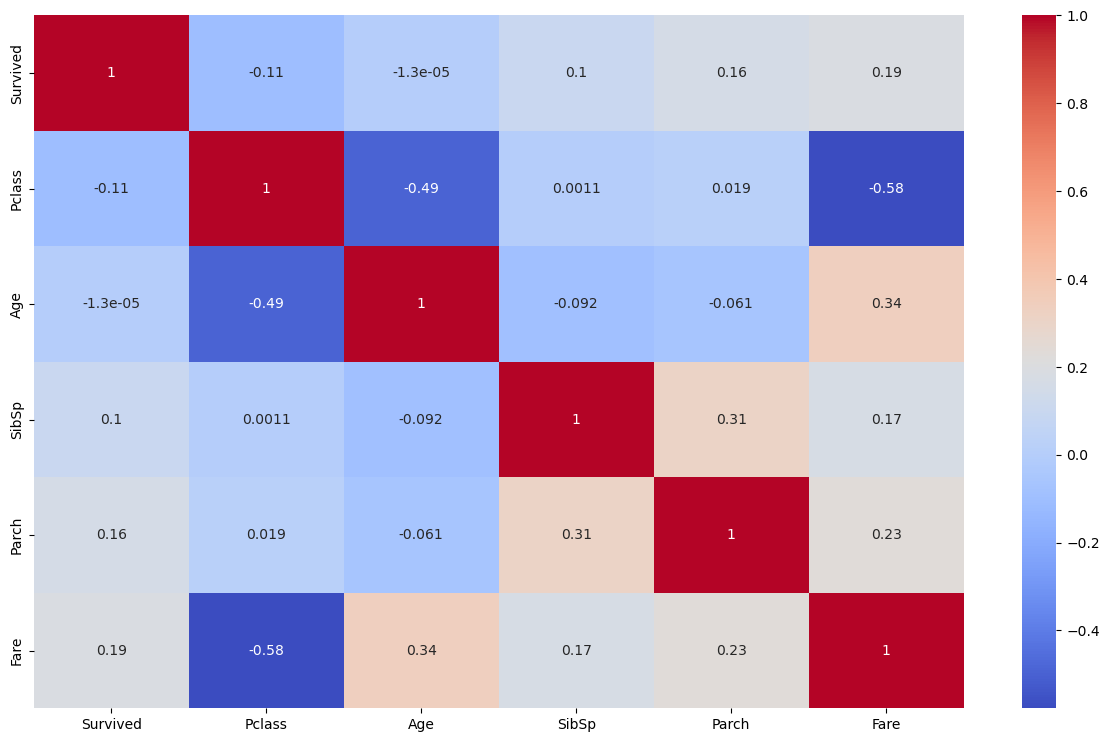

In [25]:

corr = test_df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [27]:
## drop unnecessary columns
test_df = test_df.drop(columns=['Name', 'Ticket'], axis=1)
test_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S


In [28]:
test_df["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    test_df[col] = le.fit_transform(test_df[col])
test_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,34.5,0,0,7.8292,NaN,1
1,1,3,0,47.0,1,0,7.0000,NaN,2
2,0,2,1,62.0,0,0,9.6875,NaN,1
3,0,3,1,27.0,0,0,8.6625,NaN,2
4,1,3,0,22.0,1,1,12.2875,NaN,2


In [33]:
X = test_df.drop(columns = ['Survived'],axis=1)
Y = test_df['Survived']

In [35]:
print(X)

     Pclass  Sex   Age  SibSp  Parch      Fare Cabin  Embarked
0         3    1  34.5      0      0    7.8292   NaN         1
1         3    0  47.0      1      0    7.0000   NaN         2
2         2    1  62.0      0      0    9.6875   NaN         1
3         3    1  27.0      0      0    8.6625   NaN         2
4         3    0  22.0      1      1   12.2875   NaN         2
..      ...  ...   ...    ...    ...       ...   ...       ...
413       3    1   NaN      0      0    8.0500   NaN         2
414       1    0  39.0      0      0  108.9000  C105         0
415       3    1  38.5      0      0    7.2500   NaN         2
416       3    1   NaN      0      0    8.0500   NaN         2
417       3    1   NaN      1      1   22.3583   NaN         0

[418 rows x 8 columns]
